<a href="https://colab.research.google.com/github/HARSHITA-VERMA-2147249/MACHINE-LEARNING/blob/main/2147249_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans

Reading the dataset

In [ ]:
from dataclasses import dataclass
import pandas as pd
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv", encoding= 'unicode_escape')
df.head()


FileNotFoundError: ignored

Preprocessing the dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()
df['Gender'] = labelEn.fit_transform(df['Gender'])
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,1,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,0,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,1,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,1,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df['Unit price'] = df['Unit price'].astype('int')
df['Total'] = df['Total'].astype('int')
df['cogs'] = df['cogs'].astype('int')
df['gross income'] = df['gross income'].astype('int')
df['Rating'] = df['Rating'].astype('int')

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74,7,26.1415,548,1/5/2019,13:08,Ewallet,522,4.761905,26,9
1,226-31-3081,C,Naypyitaw,Normal,0,Electronic accessories,15,5,3.8200,80,3/8/2019,10:29,Cash,76,4.761905,3,9
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46,7,16.2155,340,3/3/2019,13:23,Credit card,324,4.761905,16,7
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58,8,23.2880,489,1/27/2019,20:33,Ewallet,465,4.761905,23,8
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86,7,30.2085,634,2/8/2019,10:37,Ewallet,604,4.761905,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,1,Health and beauty,40,1,2.0175,42,1/29/2019,13:46,Ewallet,40,4.761905,2,6
996,303-96-2227,B,Mandalay,Normal,0,Home and lifestyle,97,10,48.6900,1022,3/2/2019,17:16,Ewallet,973,4.761905,48,4
997,727-02-1313,A,Yangon,Member,1,Food and beverages,31,1,1.5920,33,2/9/2019,13:22,Cash,31,4.761905,1,7
998,347-56-2442,A,Yangon,Normal,1,Home and lifestyle,65,1,3.2910,69,2/22/2019,15:33,Cash,65,4.761905,3,4


In [ ]:
df1 = df.drop(['Invoice ID', 'Branch', 'City', 'Customer type', 'Product line', 'Tax 5%', 'Date', 'Time', 'Payment'], axis=1)

In [ ]:
df1

,Gender,Unit price,Quantity,Total,cogs,gross margin percentage,gross income,Rating
0,0,74,7,548,522,4.761905,26,9
1,0,15,5,80,76,4.761905,3,9
2,1,46,7,340,324,4.761905,16,7
3,1,58,8,489,465,4.761905,23,8
4,1,86,7,634,604,4.761905,30,5
...,...,...,...,...,...,...,...,...
995,1,40,1,42,40,4.761905,2,6
996,0,97,10,1022,973,4.761905,48,4
997,1,31,1,33,31,4.761905,1,7
998,1,65,1,69,65,4.761905,3,4


In [ ]:
X = df1.iloc[:, [3, 4]].values

Applying k-means clustering

In [ ]:
kmeans = KMeans(n_clusters = 6, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

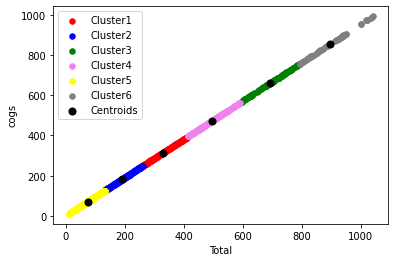

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster1') 
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster2')
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster3') 
plt.scatter( X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'violet', label = 'Cluster4') 
plt.scatter( X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'yellow', label = 'Cluster5') 
plt.scatter( X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 30, c = 'grey', label = 'Cluster6')
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.xlabel('Total') 
plt.ylabel('cogs') 
plt.legend() 

plt.show()

Applying elbow method to optimize number of clusters

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

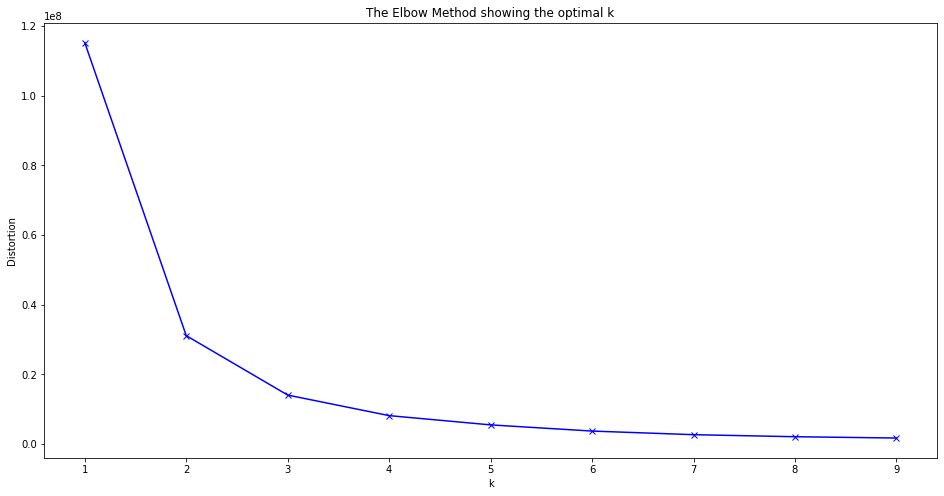

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

INFERENCE: At x = 3 value of k will be more optimized.